In [1]:
# Importing libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import warnings
warnings.filterwarnings('ignore')

# Step 0: Import libraries and Dataset

In [2]:
# Importing dataset
dataset = pd.read_csv('kaggle_diabetes.csv')

# Step 1: Descriptive Statistics

In [3]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(3340, 9)

In [5]:
# checking if the dataset has a balanced set of diabetic and non diabetc records
print (len(dataset[dataset['Outcome'] == 0]))
print (len(dataset[dataset['Outcome'] == 1]))



1816
1524


In [6]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3340 non-null   int64  
 1   Glucose                   3340 non-null   int64  
 2   BloodPressure             3340 non-null   int64  
 3   SkinThickness             3340 non-null   int64  
 4   Insulin                   3340 non-null   int64  
 5   BMI                       3340 non-null   float64
 6   DiabetesPedigreeFunction  3340 non-null   float64
 7   Age                       3340 non-null   int64  
 8   Outcome                   3340 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 235.0 KB


In [7]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,3340.0,4.026647,3.492199,0.000,1.000,3.000,6.0000,18.0
Glucose,3340.0,124.443413,32.984102,0.000,101.000,121.000,146.0000,200.0
BloodPressure,3340.0,69.295808,19.902832,0.000,64.000,72.000,80.0000,122.0
SkinThickness,3340.0,21.349401,16.265516,0.000,0.000,24.000,33.0000,110.0
Insulin,3340.0,84.387425,115.692230,0.000,0.000,37.500,140.0000,846.0
BMI,3340.0,32.705419,7.980011,0.000,27.800,32.600,37.1000,80.6
DiabetesPedigreeFunction,3340.0,0.494827,0.390794,0.008,0.251,0.393,0.6585,12.0
Age,3340.0,33.845808,11.795802,12.000,24.000,30.000,41.0000,81.0
Outcome,3340.0,0.456287,0.498160,0.000,0.000,0.000,1.0000,1.0


In [8]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Observations:
1. There are a total of 3340 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# Step 2: Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

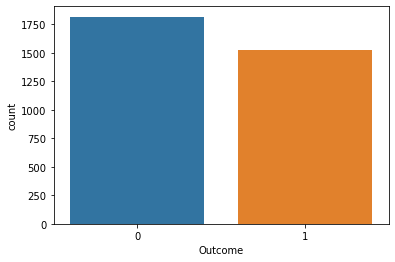

In [9]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

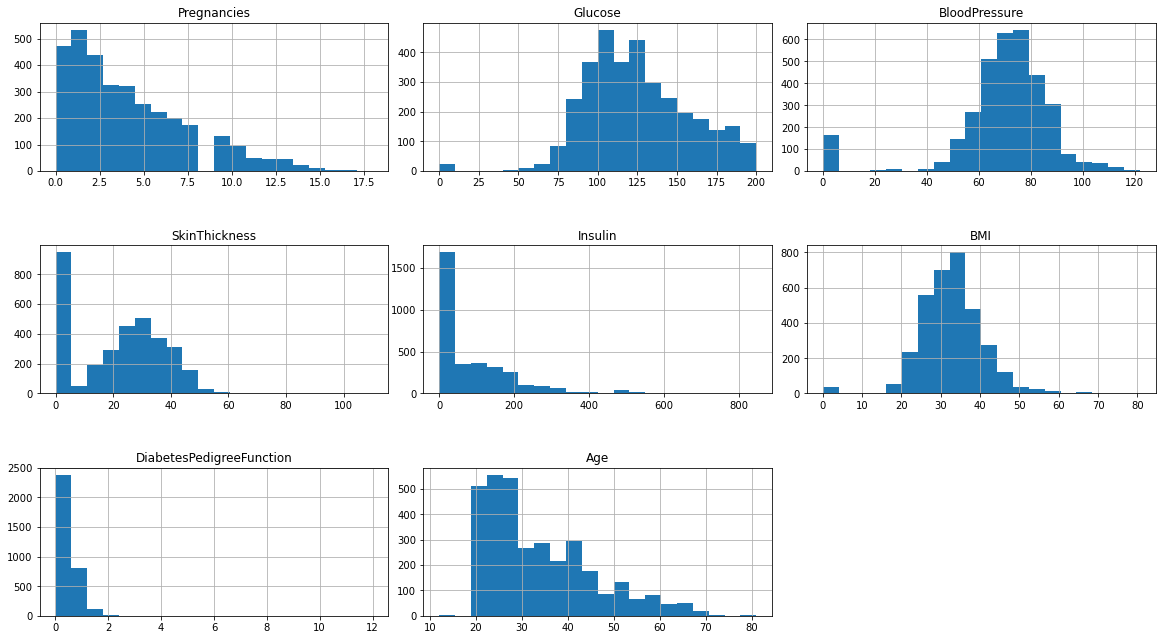

In [10]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

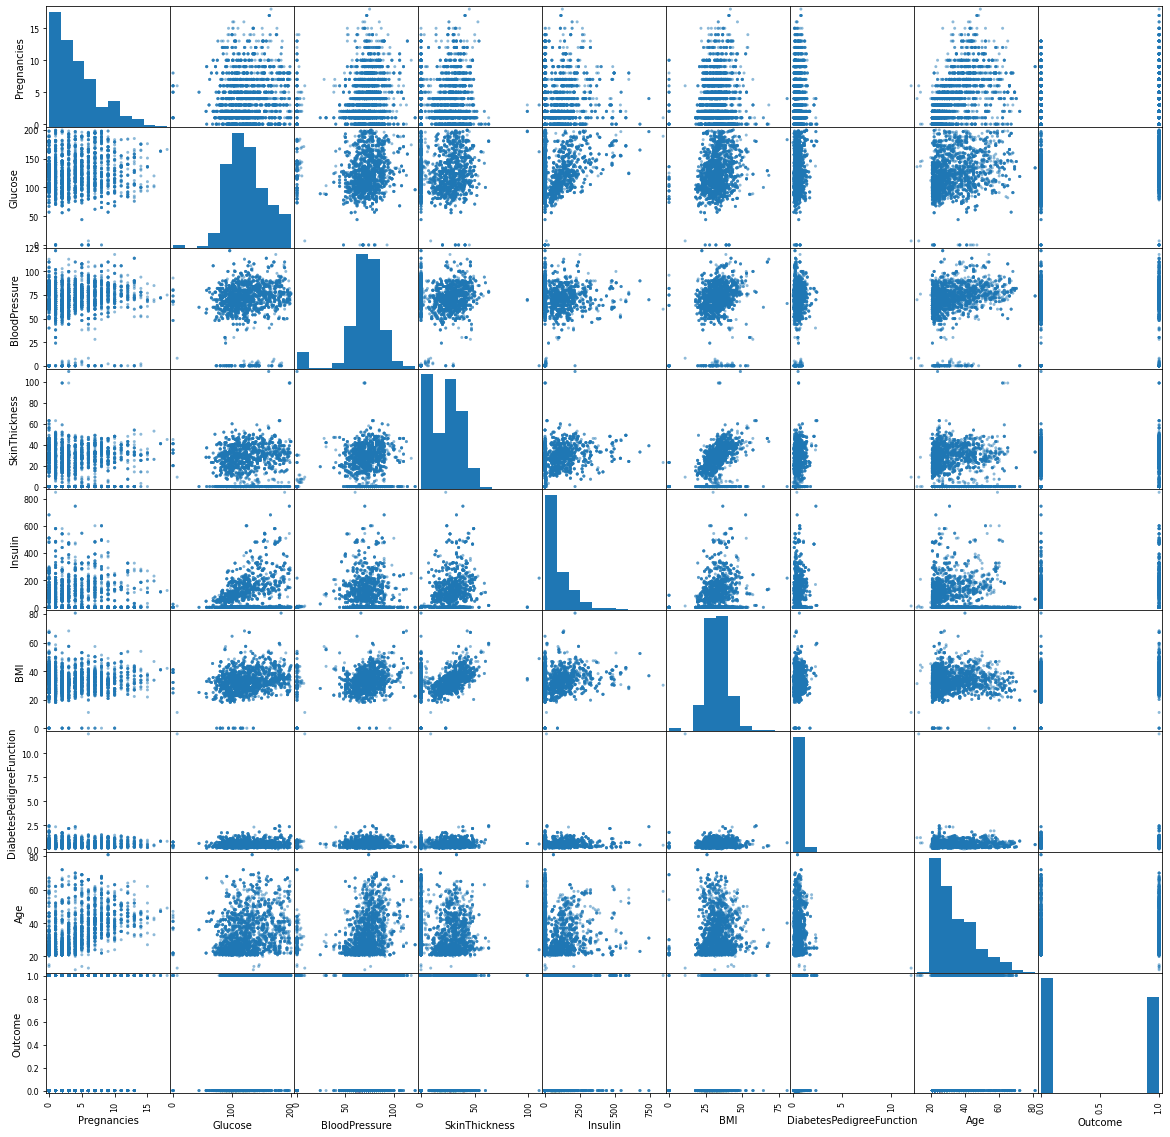

In [11]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
#from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

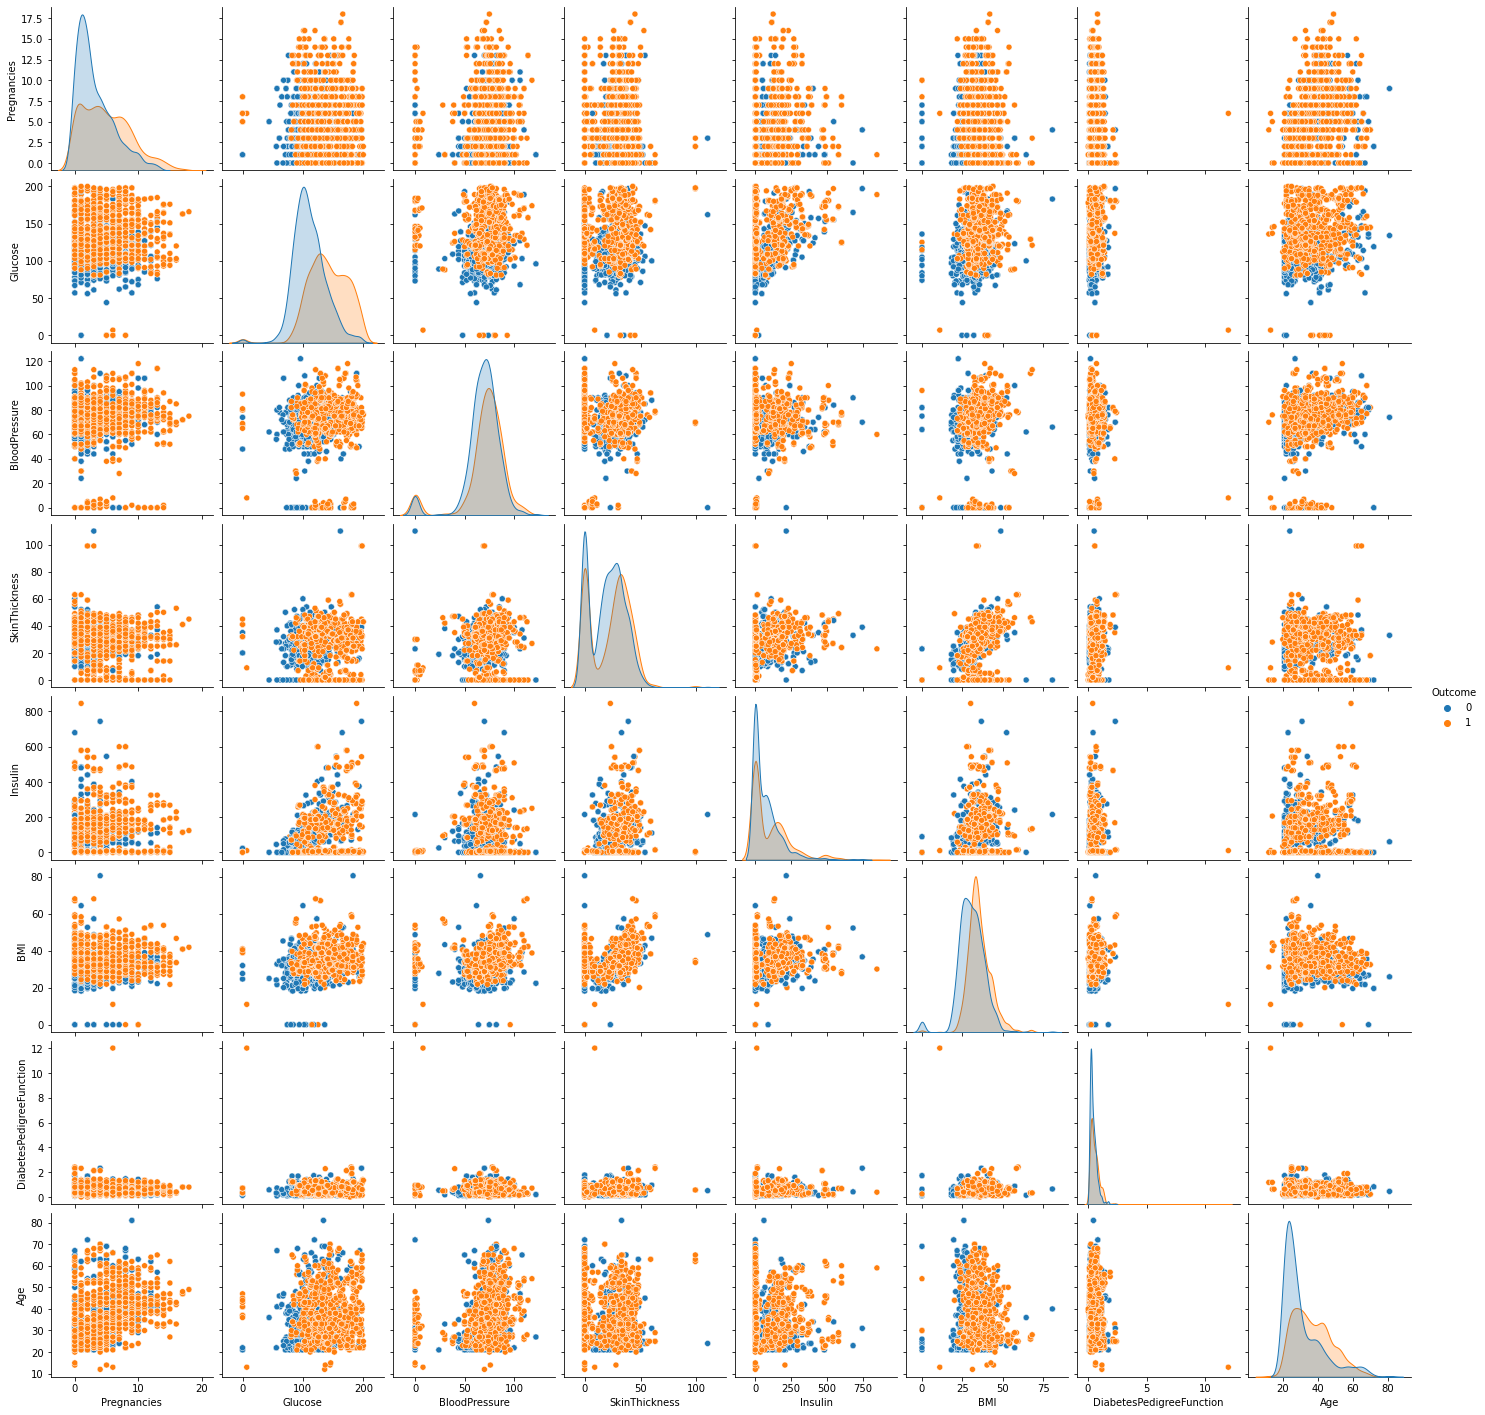

In [12]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

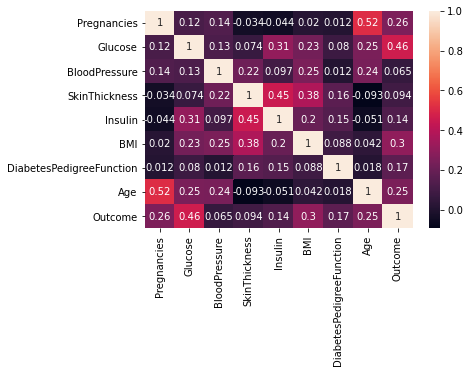

In [13]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

## Observations:
1. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

# Step 3: Data Preprocessing

In [14]:
dataset_new = dataset

In [15]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [16]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                    0
Glucose                       23
BloodPressure                150
SkinThickness                924
Insulin                     1520
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [17]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [18]:
# Statistical summary of new dataset
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,3340.0,4.026647,3.492199,0.000,1.000,3.000000,6.000000,18.0
Glucose,3340.0,125.306301,31.313545,7.000,101.000,122.000000,146.000000,200.0
BloodPressure,3340.0,72.554232,13.048371,1.000,64.750,72.554232,80.000000,122.0
SkinThickness,3340.0,29.514487,9.497111,1.000,25.000,29.514487,33.000000,110.0
Insulin,3340.0,154.864835,86.229367,2.000,120.000,154.864835,154.864835,846.0
BMI,3340.0,33.091821,7.144184,11.000,28.100,32.800000,37.100000,80.6
DiabetesPedigreeFunction,3340.0,0.494827,0.390794,0.008,0.251,0.393000,0.658500,12.0
Age,3340.0,33.845808,11.795802,12.000,24.000,30.000000,41.000000,81.0
Outcome,3340.0,0.456287,0.498160,0.000,0.000,0.000000,1.000000,1.0


In [19]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [20]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [21]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dataset_scaled.iloc[:, 8].values

In [22]:
# Splitting X and Y into training and test sets
#The primary purpose of splitting into training and test sets is to verify how well would our model perform on unseen data, 
#train the model on training set and verify its performance on the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [23]:
#There are two main approaches to random resampling for imbalanced classification;
#they are oversampling and undersampling.

#Random Oversampling: Randomly duplicate examples in the minority class.
#Random Undersampling: Randomly delete examples in the majority class.

print("Before oversampling: ",Counter(Y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, Y_train_SMOTE = SMOTE.fit_resample(X_train, Y_train)

# summarize class distribution
print("After oversampling: ",Counter(Y_train_SMOTE))


Before oversampling:  Counter({0.0: 1453, 1.0: 1219})
After oversampling:  Counter({1.0: 1453, 0.0: 1453})


In [24]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2672, 8)
X_test shape: (668, 8)
Y_train shape: (2672,)
Y_test shape: (668,)


# Step 4: Data Modelling

In [25]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

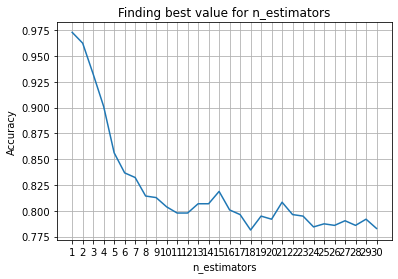

Highest value:  0.9730538922155688


In [26]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [27]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [28]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [29]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [30]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [31]:
# Random forest Algorithm
# We are approaching the Random Forest Algorithm here since it can be use for both regression and classification tasks
#Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method.
#The general idea of the bagging method is that a combination of learning models increases the overall result.
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [32]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [33]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [45]:
# Accuracy on test set
print("Logistic Regression accuracy on test set: " + str(accuracy_logreg * 100))
print("K Nearest neighbors accuracy on test set: " + str(accuracy_knn * 100))
print("Support Vector Classifier accuracy on test set: " + str(accuracy_svc * 100))
print("Naive Bayes accuracy on test set: " + str(accuracy_nb * 100))
print("Decision tree accuracy on test set: " + str(accuracy_dectree * 100))
print("Random Forest accuracy on test set: " + str(accuracy_ranfor * 100))

Logistic Regression accuracy on test set: 74.55089820359282
K Nearest neighbors accuracy on test set: 78.44311377245509
Support Vector Classifier accuracy on test set: 74.8502994011976
Naive Bayes accuracy on test set: 73.80239520958084
Decision tree accuracy on test set: 97.45508982035929
Random Forest accuracy on test set: 99.8877245508982


In [35]:
Y_pred_ranfor = ranfor.predict(X_train)

In [36]:
accuracy_ranfor = accuracy_score(Y_train, Y_pred_ranfor)

In [46]:
# Accuracy on train data set using Random Forest
print("Random Forest accuracy on training dataset: " + str(accuracy_ranfor * 100))

Random Forest accuracy on training dataset: 99.8877245508982


In [38]:
# Accuracy on test data set using Confusion matrix
#output will be a matrix with True Negative (TN) , False Positive (FP) , False Negative (FN) , True Positive (TP) values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[299,  64],
       [ 80, 225]], dtype=int64)

In [39]:
#Overall Accuracy calculation using confusion matrix
#(TP+TN)/total 

Accuracy=((303+168)/602)*100

print("Confusion matrix accuracy is", Accuracy)


Confusion matrix accuracy is 78.23920265780731


In [40]:
#confusion matrix
#true positive rate
#(TP/(FN+TP))

True_Positive_Rate=round((168/(71+168)),2)

print("True Positive Rate is", True_Positive_Rate)

True Positive Rate is 0.7


In [41]:
#confusion matrix
#true negative rate
#(TN/(TN+FP))

True_Negative_Rate=round((303/(303+60)),2)

print("True Negative Rate is", True_Negative_Rate)

True Negative Rate is 0.83


<AxesSubplot:>

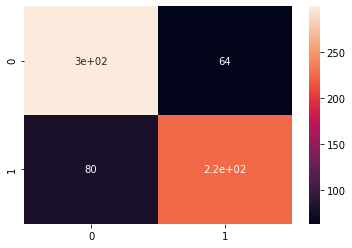

In [42]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [43]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       363
         1.0       0.78      0.74      0.76       305

    accuracy                           0.78       668
   macro avg       0.78      0.78      0.78       668
weighted avg       0.78      0.78      0.78       668



In [44]:
# Generating the pickle file primarily used in serializing and deserializing a Python object structure. In other words, it’s the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
# Advantage:Pickle is very useful for when you're working with machine learning algorithms, where you want to save them to be able to make new predictions at a later time, 
#without having to rewrite everything or train the model all over again
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(ranfor, open(filename, 'wb'))